In [1]:
import scanpy as sc
import pandas as pd
import seaborn as sns
sc.settings.set_figure_params(dpi=50, facecolor='white')

Load and normalize in vitro dataset

In [4]:
adata = sc.read_h5ad('./Data/in_vitro.h5ad')
adata.obs

,orig.ident,nCount_RNA,nFeature_RNA,percent.MT,nCount_SCT,nFeature_SCT,integrated_snn_res.0.2,seurat_clusters,Cluster,Sample,orig_ident_CellType,orig_ident
AAACCCAAGAGTTGCG-1,BELAs,59776.0,7008,5.440310,59056.0,7000,0,0,2,0,BELAs: 3,BELAs
AAACCCATCGTAGCTA-1,BELAs,50101.0,6690,5.678529,57448.0,6683,1,1,0,0,BELAs: 1,BELAs
AAACGAAAGTCCGTCG-1,BELAs,99142.0,8081,3.323516,59651.0,7466,1,1,0,0,BELAs: 1,BELAs
AAACGAATCGCGGACT-1,BELAs,100052.0,8314,4.849478,59760.0,7646,1,1,0,0,BELAs: 1,BELAs
AAACGCTCATGCCGCA-1,BELAs,64705.0,6869,4.161966,59519.0,6864,0,0,2,0,BELAs: 3,BELAs
...,...,...,...,...,...,...,...,...,...,...,...,...
TTTCAGTTCGGACCAC-1,VE Cysts,119834.0,8230,2.863962,59051.0,6849,1,1,0,1,VE Cysts: 1,VE Cysts
TTTCATGAGTCTTGGT-1,VE Cysts,48001.0,6721,6.126956,57649.0,6715,0,0,2,1,VE Cysts: 3,VE Cysts
TTTGATCTCAAGCCCG-1,VE Cysts,59230.0,6927,2.701334,58873.0,6910,1,1,0,1,VE Cysts: 1,VE Cysts
TTTGGAGGTGGATCAG-1,VE Cysts,47586.0,6893,8.794603,57624.0,6886,0,0,2,1,VE Cysts: 3,VE Cysts


... storing 'orig.ident' as categorical
... storing 'orig_ident_CellType' as categorical
... storing 'orig_ident' as categorical


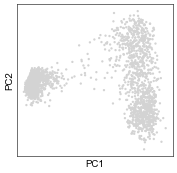

In [5]:
sc.pp.normalize_total(adata, target_sum=1e4)
sc.pp.log1p(adata)
sc.pp.highly_variable_genes(adata, min_mean=0.0125, max_mean=3, min_disp=0.5)
sc.tl.pca(adata, svd_solver='arpack')
sc.pl.pca(adata)

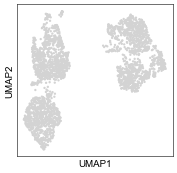

In [6]:
sc.pp.neighbors(adata, n_neighbors=10, n_pcs=40)
sc.tl.umap(adata)
sc.pl.umap(adata)

In [7]:
adata

AnnData object with n_obs × n_vars = 2691 × 32285
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'percent.MT', 'nCount_SCT', 'nFeature_SCT', 'integrated_snn_res.0.2', 'seurat_clusters', 'Cluster', 'Sample', 'orig_ident_CellType', 'orig_ident'
    var: 'features', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'log1p', 'hvg', 'pca', 'neighbors', 'umap'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'distances', 'connectivities'

Load Reference dataset from h5ad file, downloaded from endoderm explorer

In [9]:
adata_ref = sc.read_h5ad('./Data/sc_endoderm_all_cells.h5ad')
adata_ref

AnnData object with n_obs × n_vars = 113051 × 20897
    obs: 'Cluster', 'Timepoint', 'CellType'

Mark all cells without cell type annotation as undefined (this is espaccially important since E3.5 cells are not annotated and therefore otherwise dismissed in the label transfer). Also, the export to R later does not work with Nan as value for CellType

In [10]:
adata_ref.obs.CellType = adata_ref.obs.CellType.cat.add_categories('undefined')
adata_ref.obs.CellType[adata_ref.obs['CellType'].isna()] = 'undefined'
#adata_ref[adata_ref.obs.CellType == NaN]

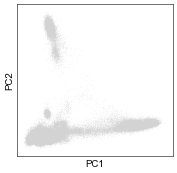

In [11]:
sc.pp.normalize_total(adata_ref, target_sum=1e4)
sc.pp.log1p(adata_ref)
sc.pp.highly_variable_genes(adata_ref, min_mean=0.0125, max_mean=3, min_disp=0.5)
sc.tl.pca(adata_ref, svd_solver='arpack')
sc.pl.pca(adata_ref)

In [12]:
sc.pp.neighbors(adata_ref, n_neighbors=10, n_pcs=40)
sc.tl.umap(adata_ref)

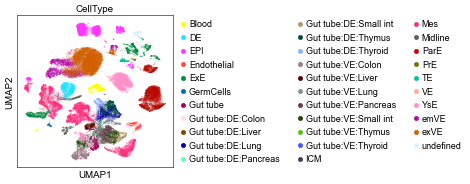

In [13]:
sc.pl.umap(adata_ref, color='CellType')

In [14]:
adata_ref

AnnData object with n_obs × n_vars = 113051 × 20897
    obs: 'Cluster', 'Timepoint', 'CellType'
    var: 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'log1p', 'hvg', 'pca', 'neighbors', 'umap', 'CellType_colors'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'distances', 'connectivities'

In [15]:
var_names = adata_ref.var_names.intersection(adata.var_names)
adata_ref = adata_ref[:, var_names]
adata = adata[:, var_names]

In [16]:
sc.pp.pca(adata_ref)
sc.pp.neighbors(adata_ref)
sc.tl.umap(adata_ref)

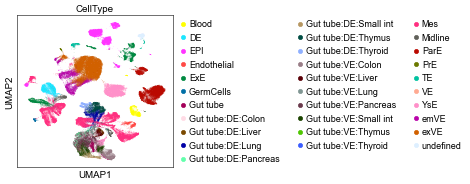

In [17]:
sc.pl.umap(adata_ref, color='CellType')


In [18]:
adata

View of AnnData object with n_obs × n_vars = 2691 × 19652
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'percent.MT', 'nCount_SCT', 'nFeature_SCT', 'integrated_snn_res.0.2', 'seurat_clusters', 'Cluster', 'Sample', 'orig_ident_CellType', 'orig_ident'
    var: 'features', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'log1p', 'hvg', 'pca', 'neighbors', 'umap'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'distances', 'connectivities'

Integrate datasets with ingest

In [19]:
sc.tl.ingest(adata, adata_ref, obs=['Timepoint','CellType'])
adata.uns['CellType_colors'] = adata_ref.uns['CellType_colors']  # fix colors

# sc.pl.umap(adata, color=['louvain', 'bulk_labels'], wspace=0.5)

In [20]:
adata_concat = adata_ref.concatenate(adata, batch_categories=['ref', 'new'])

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/anndata/_core/merge.py:891: UserWarning: Only some AnnData objects have `.raw` attribute, not concatenating `.raw` attributes.
  warn(


In [21]:
adata_concat.obs.CellType = adata_concat.obs.CellType.astype('category')
adata_concat.obs.CellType.cat.reorder_categories(adata_ref.obs.CellType.cat.categories, inplace=True)  # fix category ordering
adata_concat.uns['CellType_colors'] = adata_ref.uns['CellType_colors']  # fix category colors

... storing 'Cluster' as categorical
... storing 'orig.ident' as categorical
... storing 'orig_ident_CellType' as categorical
... storing 'orig_ident' as categorical


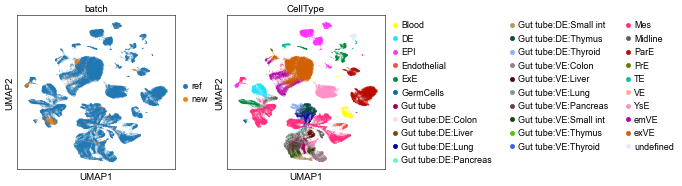

In [22]:
sc.pl.umap(adata_concat, color=['batch', 'CellType'])

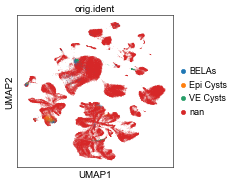

In [23]:
sc.pl.umap(adata_concat, color=['orig.ident'])

In [24]:
adata_concat = adata_concat[adata_concat.obs['Timepoint'].isin(['E3.5','E4.5', 'E5.5', 'E6.5', 'E7.5','E8.75', 'E8.75_ap', 'E8.75_gfp'])]

In [25]:
adata_concat.to_df()

,Nfatc1,Map3k13,Cyp2b23,Ralgps2,Tigar,Gm15138,Polr1d,Phf20l1,Gm3512,Fahd2a,...,Mrps26,Lgi2,Naf1,Ercc6l,4931406P16Rik,Zfp418,Dctd,Cd200,Htr1f,Tmem200b
E85anterior2A_TTTATGCTCGGATGGA-ref,0.0,0.0,0.0,0.000000,0.000000,0.000000,1.651475,0.000000,0.000000,0.000000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0
E85anterior2A_TTTATGCTCCTAGGGC-ref,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.547034,0.898632,0.000000,0.000000,...,0.000000,0.0,0.547034,0.000000,1.364172,0.0,0.000000,0.0,0.0,0.0
E85anterior2A_TTTATGCTCCAACCAA-ref,0.0,0.0,0.0,0.634029,0.000000,0.000000,1.018985,0.000000,0.000000,0.000000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0
E85anterior2A_TTTATGCAGTGGGTTG-ref,0.0,0.0,0.0,0.505314,0.000000,0.000000,1.289239,0.000000,0.000000,0.000000,...,1.089409,0.0,0.839414,0.000000,0.505314,0.0,0.000000,0.0,0.0,0.0
E85anterior2A_TTTACTGTCGGAGGTA-ref,0.0,0.0,0.0,0.000000,0.000000,0.000000,1.598843,0.686538,0.000000,0.000000,...,0.000000,0.0,0.401064,0.000000,0.401064,0.0,0.401064,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTCAGTTCGGACCAC-1-new,0.0,0.0,0.0,0.288028,0.000000,0.080149,1.467402,0.080149,0.000000,0.000000,...,0.693840,0.0,0.223421,0.288028,0.223421,0.0,0.154349,0.0,0.0,0.0
TTTCATGAGTCTTGGT-1-new,0.0,0.0,0.0,0.348301,0.000000,0.000000,1.252748,0.810919,0.000000,0.000000,...,0.000000,0.0,0.189238,0.000000,0.189238,0.0,0.000000,0.0,0.0,0.0
TTTGATCTCAAGCCCG-1-new,0.0,0.0,0.0,0.409789,0.000000,0.000000,1.262006,0.156006,0.000000,0.000000,...,0.780166,0.0,0.699626,0.924061,0.000000,0.0,0.156006,0.0,0.0,0.0
TTTGGAGGTGGATCAG-1-new,0.0,0.0,0.0,0.815752,0.000000,0.000000,0.986252,0.610083,0.000000,0.190741,...,0.350862,0.0,0.000000,0.000000,0.350862,0.0,0.350862,0.0,0.0,0.0


Save integrated data for visualization in R

In [27]:
adata_concat.write("./Data/Ingest_invitro_Nowotschin.h5ad")

In [199]:
adata_query = adata_concat[adata_concat.obs.batch.isin(['new'])]

In [200]:
adata_query_BELA = adata_query[adata_query.obs.orig_ident == 'BELAs']
adata_query_BELA

View of AnnData object with n_obs × n_vars = 1410 × 19652
    obs: 'Cluster', 'Timepoint', 'CellType', 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'percent.MT', 'nCount_SCT', 'nFeature_SCT', 'integrated_snn_res.0.2', 'seurat_clusters', 'orig_ident', 'batch'
    var: 'highly_variable-new', 'means-new', 'dispersions-new', 'dispersions_norm-new', 'features-new', 'highly_variable-ref', 'means-ref', 'dispersions-ref', 'dispersions_norm-ref'
    uns: 'CellType_colors', 'batch_colors', 'orig.ident_colors'
    obsm: 'X_pca', 'X_umap'

In [201]:
pd.crosstab(adata_query_BELA.obs.CellType, adata_query_BELA.obs.Timepoint)


Timepoint,E4.5,E5.5,E6.5,E7.5,E8.75,E8.75_ap,E8.75_gfp
CellType,,,,,,,
DE,0,0,0,5,0,0,0
EPI,0,45,312,11,0,0,0
GermCells,0,0,0,1,0,1,16
Gut tube,0,0,0,0,1,0,0
Gut tube:DE:Lung,0,0,0,0,3,0,0
Gut tube:DE:Thymus,0,0,0,0,47,0,0
Gut tube:VE:Lung,0,0,0,0,22,0,0
Mes,0,0,22,394,0,0,0
ParE,0,0,0,14,0,0,0


In [202]:
adata_query_PrECysts = adata_query[adata_query.obs.orig_ident == 'PrE Cysts']
pd.crosstab(adata_query_PrECysts.obs.CellType, adata_query_PrECysts.obs.Timepoint)

Timepoint,E4.5,E5.5,E6.5,E7.5,E8.75,E8.75_ap,E8.75_gfp
CellType,,,,,,,
EPI,0,4,14,0,0,0,0
Gut tube:DE:Thymus,0,0,0,0,1,0,0
Gut tube:VE:Lung,0,0,0,0,1,0,0
Gut tube:VE:Pancreas,0,0,0,0,14,0,0
Mes,0,0,0,26,0,0,3
ParE,0,0,0,66,1,0,0
PrE,4,2,0,0,0,0,0
YsE,0,0,0,1,21,10,45
emVE,0,0,0,23,0,0,0


In [203]:
adata_query_EpiCysts = adata_query[adata_query.obs.orig_ident == 'Epi Cysts']
pd.crosstab(adata_query_EpiCysts.obs.CellType, adata_query_EpiCysts.obs.Timepoint)

Timepoint,E5.5,E6.5,E7.5,E8.75,E8.75_ap,E8.75_gfp
CellType,,,,,,
EPI,8,61,0,0,0,0
GermCells,0,0,0,0,2,11
Gut tube:DE:Lung,0,0,0,8,0,0
Gut tube:DE:Thymus,0,0,0,23,0,0
Gut tube:VE:Liver,0,0,0,1,0,0
Gut tube:VE:Lung,0,0,0,1,0,0
Mes,0,5,486,3,0,46
emVE,0,0,1,0,0,0
